In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Dropout
from keras.models import Sequential
import tensorflow as tf
import keras
from datetime import datetime

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

import sys
sys.path.append('/home/imetomi/Minyma/Minyma-DEV')
sys.path.append('C:/Users/Imetomi/Documents/MEGA/Minyma/Minyma-DEV')


Using TensorFlow backend.


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [4]:
test = X[int(len(X) * 0.7):]

In [5]:
signals = pd.read_csv('data/entries.csv')

In [6]:
signals

,Unnamed: 0,entry
0,0,0.769452
1,1,0.757952
2,2,0.773069
3,3,0.778390
4,4,0.791820
...,...,...
50974,50974,0.822185
50975,50975,0.830917
50976,50976,0.837966
50977,50977,0.810042


In [7]:
cleaned_data = pd.read_csv('data/lob_cleaned.csv')

In [8]:
cleaned_data

,Unnamed: 0,date,timestamp,ask,bid,askvol,bidvol,ask10,ask20,ask30,...,bid130,bid140,bid150,bid160,bid170,bid180,bid190,bid200,mid,change
0,0,2021-02-27 16:07:33.369,1614434853369,47400.01,47400.01,105.922589,8.212342,1.219452,1.738009,2.261343,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,47400.010,NaN
1,1,2021-02-27 16:07:34.369,1614434854369,47400.01,47410.18,7.105951,7.209818,2.066333,0.732340,2.961463,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,47405.095,1.072785e-04
2,2,2021-02-27 16:07:35.369,1614434855369,47399.84,47400.00,6.765404,21.977592,1.043097,1.878350,2.737661,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,47399.920,-1.091655e-04
3,3,2021-02-27 16:07:36.369,1614434856369,47400.01,47400.00,23.191152,149.827174,0.449528,0.042198,1.525882,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,47400.005,1.793252e-06
4,4,2021-02-27 16:07:37.369,1614434857369,47400.01,47402.38,189.998602,4.397697,0.468743,1.169567,0.004114,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,47401.195,2.510548e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170315,170315,2021-03-01 15:27:20.157,1614605240157,48104.83,48107.36,10.261711,196.191527,0.438021,0.540848,0.500000,...,1.365727,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,48106.095,8.834717e-06
170316,170316,2021-03-01 15:27:21.157,1614605241157,48104.83,48112.98,253.300547,204.274166,0.316580,1.205518,2.803350,...,0.840576,4.663134,0.000000,0.00,0.000000,0.0,0.0,0.0,48108.905,5.841256e-05
170317,170317,2021-03-01 15:27:22.157,1614605242157,48112.99,48112.99,274.752130,335.102035,0.248469,0.827158,0.551761,...,0.015300,3.557690,0.000000,0.00,0.000000,0.0,0.0,0.0,48112.990,8.491151e-05
170318,170318,2021-03-01 15:27:23.157,1614605243157,48113.00,48112.99,10.008420,171.132191,0.092687,0.062393,3.899253,...,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,48112.995,1.039220e-07


In [9]:
from_index = int(len(cleaned_data) * 0.7 + 51096 - 50979)

In [27]:
data = pd.DataFrame(columns=['Date', 'Time', 'AO', 'AH', 'AL', 'AC', 'BO', 'BH', 'BL', 'BC', 'Entry'])
data.Date = [date[0] for date in cleaned_data.date.str.split(' ')][from_index:]
data.Time = [date[1] for date in cleaned_data.date.str.split(' ')][from_index:]
data.AC = cleaned_data.ask[from_index:].reset_index().ask
data.AO = cleaned_data.ask[from_index:].reset_index().ask
data.AL = cleaned_data.ask[from_index:].reset_index().ask
data.AH = cleaned_data.ask[from_index:].reset_index().ask
data.BC = cleaned_data.bid[from_index:].reset_index().bid
data.BH = cleaned_data.bid[from_index:].reset_index().bid
data.BL = cleaned_data.bid[from_index:].reset_index().bid
data.BO = cleaned_data.bid[from_index:].reset_index().bid
data.Entry = signals.entry

In [28]:
len(signals)

50979

In [29]:
data

,Date,Time,AO,AH,AL,AC,BO,BH,BL,BC,Entry
0,2021-03-01,01:16:39.881,45707.82000,45707.82000,45707.82000,45707.82000,45713.86000,45713.86000,45713.86000,45713.86000,0.76945
1,2021-03-01,01:16:40.881,45707.82000,45707.82000,45707.82000,45707.82000,45711.80000,45711.80000,45711.80000,45711.80000,0.75795
2,2021-03-01,01:16:41.881,45700.01000,45700.01000,45700.01000,45700.01000,45707.81000,45707.81000,45707.81000,45707.81000,0.77307
3,2021-03-01,01:16:42.881,45694.13000,45694.13000,45694.13000,45694.13000,45700.00000,45700.00000,45700.00000,45700.00000,0.77839
4,2021-03-01,01:16:43.881,45692.99000,45692.99000,45692.99000,45692.99000,45695.41000,45695.41000,45695.41000,45695.41000,0.79182
...,...,...,...,...,...,...,...,...,...,...,...
50974,2021-03-01,15:27:20.157,48104.83000,48104.83000,48104.83000,48104.83000,48107.36000,48107.36000,48107.36000,48107.36000,0.82218
50975,2021-03-01,15:27:21.157,48104.83000,48104.83000,48104.83000,48104.83000,48112.98000,48112.98000,48112.98000,48112.98000,0.83092
50976,2021-03-01,15:27:22.157,48112.99000,48112.99000,48112.99000,48112.99000,48112.99000,48112.99000,48112.99000,48112.99000,0.83797
50977,2021-03-01,15:27:23.157,48113.00000,48113.00000,48113.00000,48113.00000,48112.99000,48112.99000,48112.99000,48112.99000,0.81004


In [30]:
from backtest.backtest import Backtest

In [31]:
from backtest.strategy import Strategy
from backtest.backtest import Backtest
from backtest.analysis import Analysis

In [32]:
class DLModel(Strategy):
	def __init__(self, *args, **kwargs):
		self.prev_profit = 0
		self.trailing = 1.45 / 100
		super(DLModel, self).__init__(*args, **kwargs)

	def execute(self, backtest, row, idx):
		if backtest.Data.Entry[idx] > 0.91:
			backtest.close(row, 0)
			backtest.buy(row, self.Instrument, self.TradeAmmount, self.StopLoss * backtest.Balance, self.TakeProfit * backtest.Balance)

In [33]:
leverage = 1
trade_amount = 1
symbol = 'btcusdt'

In [39]:
strat = DLModel(0.03 * leverage * trade_amount, 0.05 * leverage * trade_amount, symbol.upper(), trade_amount)

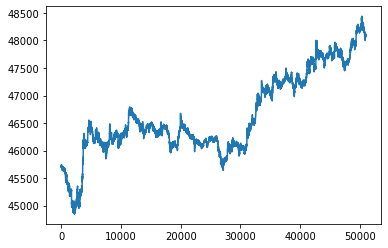

In [40]:
import matplotlib.pyplot as plt

plt.plot(cleaned_data.ask[from_index:].reset_index().ask)

In [41]:
backtest = Backtest(strat, datetime(2021, 3, 1), datetime(2021, 3, 1), data, direct=False, leverage=leverage, balance=1000, commission=0.04, max_units=200000000, verbose=0)
backtest.run()

In [42]:
backtest.TradeLog

,Type,Instrument,Open Time,Close Time,Units,Margin Used,Open Price,Close Price,Spread,Profit,Balance,AutoClose,TP,SL,Fee1,Fee2
0,BUY,BTCUSDT,2021-03-01 01:40:56.959,2021-03-01 01:41:00.959,0.02208,1000.00000,45281.50000,45284.34000,2.84000,0.06272,999.26269,False,50.00000,30.00000,0.40000,0.40003
1,BUY,BTCUSDT,2021-03-01 01:41:00.959,2021-03-01 01:41:08.960,0.02207,999.26269,45277.30000,45286.88000,9.58000,0.21143,998.67463,False,49.96313,29.97788,0.39971,0.39979
2,BUY,BTCUSDT,2021-03-01 01:41:08.960,2021-03-01 01:41:12.960,0.02205,998.67463,45283.31000,45298.96000,15.65000,0.34514,998.22069,False,49.93373,29.96024,0.39947,0.39961
3,BUY,BTCUSDT,2021-03-01 01:41:12.960,2021-03-01 01:41:13.960,0.02204,998.22069,45293.98000,45300.70000,6.72000,0.14810,997.57016,False,49.91103,29.94662,0.39929,0.39935
4,BUY,BTCUSDT,2021-03-01 01:41:13.960,2021-03-01 01:41:16.960,0.02203,997.57016,45291.50000,45300.00000,8.50000,0.18722,996.95924,False,49.87851,29.92710,0.39903,0.39910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,BUY,BTCUSDT,2021-03-01 15:04:07.103,2021-03-01 15:04:11.103,0.01987,957.46427,48189.40000,48228.38000,38.98000,0.77448,957.47247,False,47.87321,28.72393,0.38299,0.38330
176,BUY,BTCUSDT,2021-03-01 15:04:11.103,2021-03-01 15:04:15.103,0.01985,957.47247,48226.08000,48221.38000,-4.70000,-0.09331,956.61322,False,47.87362,28.72417,0.38299,0.38295
177,BUY,BTCUSDT,2021-03-01 15:04:15.103,2021-03-01 15:04:16.103,0.01984,956.61322,48216.27000,48221.07000,4.80000,0.09523,955.94312,False,47.83066,28.69840,0.38265,0.38268
178,BUY,BTCUSDT,2021-03-01 15:04:16.103,2021-03-01 15:19:06.138,0.01983,955.94312,48216.27000,48226.64000,10.37000,0.20560,955.38389,False,47.79716,28.67829,0.38238,0.38246


In [38]:
analysis = Analysis(backtest, sortino=0.6, log=True)
analysis.analyze()
analysis.plot('results.html')


/home/imetomi/Minyma/Minyma-DEV/backtest/analysis.py:200: RuntimeWarning:

invalid value encountered in double_scalars

[WARNING] Low resolution benchmark data.
[WARNING] Low resolution benchmark data.
[WARNING] Low resolution benchmark data.
